**0. AVANT DE COMMENCER / BEFORE WE START**


Avant de commencer, téléchargez ce dataset sur votre PC et importez-le dans votre Google Drive
https://drive.google.com/file/d/1GoXwFQCbKE0o32VE44G1NhpsvfPtX2d0/view?usp=drive_link

le lien d'origine de ce dataset est sur kaggle :
https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data

**1. IMPORT DU DATASET / IMPORT OF THE DATASET**

Note that we think we should restructure this notebook into 3 parts:
1. feature engineering notebook
2. training notebook
3. inferencing notebook

J'ai un dataset sur un URL en format csv. Comment l'importer sur google colab dans une variable ?

In [ ]:
# Importer les bibliothèques nécessaires / Import the necessary libraries
import pandas as pd

# Chemin vers le fichier CSV / Path to the source CSV file
chemin_fichier = "https://repo.hops.works/dev/jdowling/car_prices.csv"

# Lire le fichier CSV et l'enregistrer dans une variable "data" / Read the source file and store in variable "data"
data = pd.read_csv(chemin_fichier)

**2. VISUALISATION DU DATASET / VISUALISATION OF THE DATASET**

Je veux visualiser ce fichier. Comment voir les noms des colonnes avec les 5 premières valeurs ?

In [ ]:
# Afficher les noms de colonnes / Show the name of the columns
print("Noms des colonnes / Name of the columns:")
print(data.columns)

# Afficher les cinq premières valeurs / Show the first 5 values
print("\nCinq premières valeurs / First 5 values:")
print(data.head())

Noms des colonnes / Name of the columns:
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

Cinq premières valeurs / First 5 values:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1

Comment savoir combien de données et combien de variables (avec leurs noms et leur type) il y a dans ce dataset ?


In [ ]:
# Afficher des informations sur le dataset / Show info about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None


Affiche les valeurs possibles des données non numériques

In [ ]:
# Sélectionner les colonnes non numériques / Select non-numeric columns
colonnes_non_numeriques = data.select_dtypes(exclude=['float', 'int']).columns

# Afficher les valeurs uniques dans ces colonnes
for colonne in colonnes_non_numeriques:
    print(colonne, data[colonne].unique())

make ['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']
model ['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' '

Comment savoir s'il y a des données manquantes ou nulles et dans quelles colonnes d'un dataset

In [ ]:
# Vérifier s'il y a des valeurs manquantes ou nulles dans chaque colonne du dataset
# Check if there are missing values or null-values in every column of the dataset
missing_values_per_column = data.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes ou nulles
# Display the columns with missing or null values
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Colonnes avec des valeurs manquantes ou nulles / Columns with missing or null values:")
print(columns_with_missing_values)


Colonnes avec des valeurs manquantes ou nulles / Columns with missing or null values:
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
condition       11820
odometer           94
color             749
interior          749
mmr                38
sellingprice       12
saledate           12
dtype: int64


imprime un graphique des distributions des valeurs de la colonne "sellingprice"

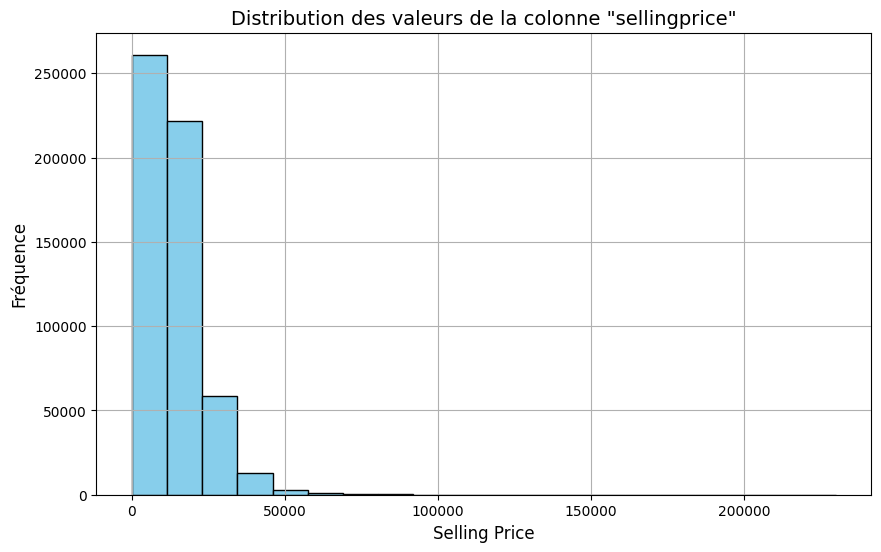

In [ ]:
import matplotlib.pyplot as plt

# Paramètres du graphique / Parameters of the chart
plt.figure(figsize=(10, 6))  # Définit la taille de la figure / defines the size of the figure

# Tracer l'histogramme / Trace the histogram
plt.hist(data['sellingprice'], bins=20, color='skyblue', edgecolor='black')  # Utilise 20 bins (barres) / Use 20 bins (bars)

# Titres et labels / Titles and labels
plt.title('Distribution des valeurs de la colonne "sellingprice"', fontsize=14)
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Affichage du graphique / Show the graphic
plt.grid(True)  # Ajoute une grille / add a grid
plt.show()


Quelles sont les valeurs possibles dans la colonne "year" ?

In [ ]:
# Trouver les valeurs uniques dans la colonne "year" / Find the unique values in the "year" column
valeurs_year = data['year'].unique()

# Afficher les valeurs uniques / Show the unique values
print("Valeurs uniques dans la colonne 'year' / Unique values in the 'year' column:")
print(valeurs_year)


Valeurs uniques dans la colonne 'year' / Unique values in the 'year' column:
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]


Quelles sont les valeurs possibles dans la colonne "make" ?

In [ ]:
# Trouver les valeurs uniques dans la colonne "make" / Find the unique values in the "make" column
valeurs_make = data['make'].unique()

# Afficher les valeurs uniques / Show the unique values
print("Valeurs uniques dans la colonne 'make' / show the values in the 'make' column :")
print(valeurs_make)


Valeurs uniques dans la colonne 'make' / show the values in the 'make' column :
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamb

Quelles sont les valeurs possibles dans la colonne "trim" ?

In [ ]:
# Trouver les valeurs uniques dans la colonne "trim" / Find the unique values in the "trim" column
valeurs_trim = data['trim'].unique()

# Afficher les valeurs uniques / Show the unique values
print("Valeurs uniques dans la colonne 'trim' / Unique values in the 'trim' column:")
print(list(valeurs_trim))

Valeurs uniques dans la colonne 'trim' / Unique values in the 'trim' column:
['LX', '328i SULEV', 'T5', '650i', '2.5 S', 'Base', '1LT', '2.0T Premium Plus quattro', 'LT', '3.0T Prestige quattro', 'SE', '2LT', 'LS', 'LTZ', '528i', '1.8 TFSI Premium', 'T6', 'sDrive35i', '3.0T Premium Plus quattro', 'Premium Plus quattro', 'Convenience Group', 'xDrive35i', 'Technology Package', 'Luxury', '1.6 SL', '1.6 SV', 'L 3.0T quattro', 'sDrive28i', '750Li', 'Leather Group', 'quattro', '428i SULEV', 'Work Truck', 'Advance and Entertainment Packages', '535d', 'G37 Sport', 'G37 Journey', 'FX37', 'Limited', '5.0 R-Spec', 'Signature', 'GLS', 'Sport', 'Sport 2.0T', 'Turbo', 'GS', 'Ultimate', '3.8', '3.8 Track', 'Unlimited Rubicon', 'EX Hybrid', '2.5', 'S550', 'C250', 'SX', 'Unlimited Sahara', 'C250 Sport', 'Touring', 'M37', '+', 'LE', 'SLK350', 'E350 Sport', 'i SV', 'Latitude', 'i Touring', 'JX35', 'G37x', 'HSE LUX', 'EX', 'i Sport', 'Pure Plus', 'L', 'GLK350', 'Unlimited Sport', 'E350 Sport BlueTEC', 'Pu

**3. NETTOYAGE DES DONNÉES / CLEANING OF THE DATA**

> Add blockquote



Le dataset a des variables "vin", "state", "mmr", "saledate" "seller" et "state" effaces-les du dataset

In [ ]:
# Supprimer les colonnes spécifiées du DataFrame / Remove specific columns of the dataset
df = data.drop(['vin', 'state', 'mmr'], axis=1)

# Vérifier que les colonnes ont été supprimées / Check if the columns have been removed
if all(col not in df.columns for col in ['vin', 'state', 'mmr']):
    print("Les colonnes 'vin', 'state', 'mmr', 'seller' ont été supprimées avec succès.")
    print("The columns 'vin', 'state', 'mmr', 'seller' have been succesfully removed.")
else:
    print("Les colonnes n'ont pas été supprimées correctement. Assurez-vous que les noms des colonnes sont corrects.")
    print("The columns were not deleted correctly. Make sure the column names are correct.")

Les colonnes 'vin', 'state', 'mmr', 'seller' ont été supprimées avec succès.
The columns 'vin', 'state', 'mmr', 'seller' have been succesfully removed.


Efface toutes les données manquantes ou nulles du dataset

In [ ]:
# Nombre de lignes avant la suppression
# Number of lines before deletion
num_rows_before = df.shape[0]

# Supprimer toutes les lignes contenant des données manquantes ou nulles
# Delete all rows with missing or zero data
df1 = df.dropna()

# Nombre de lignes après la suppression
# Number of lines after deletion
num_rows_after = df1.shape[0]

# Nombre de lignes supprimées
# Number of lines deleted
num_rows_deleted = num_rows_before - num_rows_after

print(f"Nombre de lignes supprimées : {num_rows_deleted}")
print(f"Number of lines deleted: {num_rows_deleted}")


Nombre de lignes supprimées : 86512
Number of lines deleted: 86512


In [ ]:
# Additional changes to the dataframe wrt the "saledate" column: this will be necessary for our import into Hopsworks

from datetime import datetime, timezone

def convert_to_datetime_utc(date_str):
    try:
        # Remove the timezone abbreviation
        date_str = date_str.split(' (')[0]
        # Convert to datetime with timezone information
        dt_with_tz = datetime.strptime(date_str, '%a %b %d %Y %H:%M:%S GMT%z')
        # Convert to UTC and then remove timezone info
        dt_utc = dt_with_tz.astimezone(timezone.utc).replace(tzinfo=None)
        return dt_utc
    except Exception as e:
        print(f"Error converting date: {date_str} - {e}")
        return pd.NaT

# Apply the conversion function to the date_column
df1['saledate'] = df1['saledate'].apply(lambda x: convert_to_datetime_utc(x) if pd.notna(x) else pd.NaT)
df1

<ipython-input-15-71527bd35a14>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['saledate'] = df1['saledate'].apply(lambda x: convert_to_datetime_utc(x) if pd.notna(x) else pd.NaT)


,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 20:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 20:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-15 12:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-29 12:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 20:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,22800.0,2015-07-07 13:15:00
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,5.0,54393.0,white,black,i -5 uhlmann rv,30800.0,2015-07-08 16:30:00
558834,2012,BMW,X5,xDrive35d,SUV,automatic,48.0,50561.0,black,black,financial services remarketing (lease),34000.0,2015-07-08 16:30:00
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,11100.0,2015-07-09 13:45:00


Quelle est la moyenne dans la colonne "sellingprice", quelle est la valeur la plus petite et la plus grande ?

In [ ]:
# Calcul de la moyenne dans la colonne "sellingprice"
# Calculation of the average in the "sellingprice" column
moyenne_sellingprice = df1['sellingprice'].mean()
print("Moyenne dans la colonne 'sellingprice' :", moyenne_sellingprice)
print("Average of the column 'sellingprice' :", moyenne_sellingprice)


# Valeur la plus petite dans la colonne "sellingprice"
# Smallest value in the "sellingprice" column
plus_petite_valeur = df1['sellingprice'].min()
print("Valeur la plus petite dans la colonne 'sellingprice' :", plus_petite_valeur)
print("Smalles of the column 'sellingprice' :", plus_petite_valeur)

# Valeur la plus grande dans la colonne "sellingprice"
# Largest value in the "sellingprice" column
plus_grande_valeur = df1['sellingprice'].max()
print("Valeur la plus grande dans la colonne 'sellingprice' :", plus_grande_valeur)
print("Largest value in the column 'sellingprice' :", plus_grande_valeur)


Moyenne dans la colonne 'sellingprice' : 13690.51205843434
Average of the column 'sellingprice' : 13690.51205843434
Valeur la plus petite dans la colonne 'sellingprice' : 1.0
Smalles of the column 'sellingprice' : 1.0
Valeur la plus grande dans la colonne 'sellingprice' : 230000.0
Largest value in the column 'sellingprice' : 230000.0


Efface toutes les données avec une valeur inférieur ou égale à 1000 ou supérieures à 50000 dans la colonne "sellingprice". Dis-moi aussi combien de données ont été effacées

In [ ]:
# Compter le nombre de données avant la suppression
# Count the number of data before deletion
nb_lignes_avant = len(df1)

# Effacer les données avec une valeur égale à 1 ou supérieure à 80000 dans la colonne "sellingprice"
# Clear data with value equal to 1 or greater than 80000 in "sellingprice" column
df2 = df1[(df1['sellingprice'] > 1000) & (df1['sellingprice'] < 50000)]

# Compter le nombre de données après la suppression
# Count the number of data after deletion
nb_lignes_apres = len(df2)

# Calculer le nombre de données effacées
# Calculate the number of erased data
nb_effacees = nb_lignes_avant - nb_lignes_apres

# Afficher le nombre de données effacées
# Show number of erased data
print("Nombre de données effacées :", nb_effacees)
print("Number of erased data :", nb_effacees)


Nombre de données effacées : 16001
Number of erased data : 16001


Le dataset a une colonne "interior" et une colonne "color" est-ce qu'il y a des valeurs manquantes, nulles, égales à "—" ou avec des valeurs numériques dans cette colonne ? si oui, efface ces données du dataset et dis-moi combien de données ont été effacées

In [ ]:
# Compter le nombre de données avant la suppression
# Count the number of data before deletion
nb_lignes_avant = len(df2)

# Effacer les données avec des valeurs manquantes, nulles ou égales à "—" dans les colonnes "interior" et "color"
# Clear data with missing, zero, or "—" values ​​in the "interior" and "color" columns
df3 = df2[(df2['interior'] != '—') & (df2['color'] != '—') & (df2['interior'].notnull()) & (df2['color'].notnull())]

# Compter le nombre de données après la suppression
# Count the number of data after deletion
nb_lignes_apres = len(df3)

# Calculer le nombre de données effacées
# Calculate the number of erased data
nb_effacees = nb_lignes_avant - nb_lignes_apres

# Afficher le nombre de données effacées
# Show number of erased data
print("Nombre de données effacées :", nb_effacees)
print("Number of erased data :", nb_effacees)

Nombre de données effacées : 30723
Number of erased data : 30723


Exporte le dataset propre avec toutes ces modifications dans un fichier csv

In [ ]:
# Install the Hopsworks client library in the runtime. This will be used to connect to Hopsworks.
## Note that in Colab, this will throw an error but the system will still work.
!pip install --quiet hopsworks

In [ ]:
# data.to_csv('dataset_cleaned.csv', index=False)
import hopsworks

proj = hopsworks.login()
fs = proj.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) GraphEmbeddingsDemo
	 (2) rixdemo
	 (3) BeerVolumePrediction

Enter project to access: 2

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/189590
Connected. Call `.close()` to terminate connection gracefully.


In [ ]:
# Create a feature group in Hopsworks based on the above dataframe

fg = fs.get_or_create_feature_group(name="car_prices",
                                    version=1,
                                    description="Le prix des voitures",
                                    primary_key=["seller", "saledate"],
                                    event_time="saledate"
                                    )
fg.insert(df3)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/189590/fs/189509/fg/922989


Uploading Dataframe: 0.00% |          | Rows 0/425601 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: car_prices_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/189590/jobs/named/car_prices_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7a11cd623880>, None)

# Training Pipeline

Note that Hopsworks would recommend to split this part of the notebook into a 3 separate files:
1. feature engineering notebook
2. training notebook
3. inferencing notebook

**4. PRÉPARATION DES DONNÉES / PREPARING THE DATA**


Un modèle de machine learning est une équation mathématique. Une équation ne peut accepter autre chose que des chiffres. Vos données catégoriques doivent être donc transformées (encodées) en données numériques à cette étape. Cependant, si vous encodéz les données, vous devez aussi sauvegarder le encodeur pour après décodifier une fois le modèle entraîné

In [ ]:
# Install the Hopsworks client library
!pip install --quiet hopsworks

In [ ]:
# Connect to the Hopsworks Feature store and get the feature group
import hopsworks
proj = hopsworks.login()
fs = proj.get_feature_store()
fg = fs.get_feature_group(name="car_prices", version=1)

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) GraphEmbeddingsDemo
	 (2) rixdemo
	 (3) BeerVolumePrediction

Enter project to access: 2

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/189590
Connected. Call `.close()` to terminate connection gracefully.


In [ ]:
# Create a feature view for the training
feature_view = fs.get_or_create_feature_view(name="car_prices",
                                             version=1,
                                             query= fg.select_except(["seller", "saledate"]),
                                             labels=["sellingprice"]
                                             )

Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/189590/fs/189509/fv/car_prices/version/1


In [ ]:
import pandas as pd

features_df, labels_df = feature_view.training_data()
features_df

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (3.83s) 


,year,make,model,trim,body,transmission,condition,odometer,color,interior
0,2003,Mercury,Mountaineer,Convenience,SUV,automatic,31.0,86584.0,silver,gray
1,2007,Chevrolet,Tahoe,LT,SUV,automatic,26.0,100833.0,white,gray
2,2001,Acura,TL,3.2,Sedan,automatic,46.0,241875.0,black,black
3,2002,Nissan,Maxima,GLE,Sedan,automatic,28.0,153046.0,gold,tan
4,2011,Toyota,Tacoma,V6,Double Cab,automatic,44.0,57316.0,silver,gray
...,...,...,...,...,...,...,...,...,...,...
70214,2012,Lexus,IS 250,Base,Sedan,automatic,19.0,16837.0,gray,black
70215,2009,Ford,F-350 Super Duty,XL,Crew Cab,manual,25.0,79124.0,white,gray
70216,2003,GMC,Yukon,Denali,SUV,automatic,28.0,146113.0,black,tan
70217,2006,Saab,9-3,Aero,Convertible,automatic,23.0,48079.0,blue,gray


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
import joblib

def encode_categorical_data(dataset, label_encoders):
    # Itérer sur les colonnes du DataFrame
    for column in dataset.columns:
        # Vérifier si la colonne est de type 'object' (catégorique)
        if dataset[column].dtype == 'object':
            # Créer une instance de LabelEncoder
            label_encoder = LabelEncoder()

            # Effectuer l'encodage sur les valeurs uniques de la colonne
            dataset[column] = label_encoder.fit_transform(dataset[column])

            # Ajouter le label encoder au dictionnaire
            label_encoders[column] = label_encoder
    return dataset

# Créer un dictionnaire pour stocker les label encoders
clf = {}
df_encoded = encode_categorical_data(features_df, clf)
df_encoded

,year,make,model,trim,body,transmission,condition,odometer,color,interior
0,2003,31,403,412,31,0,31.0,86584.0,15,6
1,2007,7,578,657,31,0,26.0,100833.0,17,6
2,2001,0,572,167,32,0,46.0,241875.0,1,1
3,2002,33,382,540,32,0,28.0,153046.0,6,13
4,2011,45,577,1057,11,0,44.0,57316.0,15,6
...,...,...,...,...,...,...,...,...,...,...
70214,2012,24,302,321,32,0,19.0,16837.0,7,1
70215,2009,12,225,1129,9,1,25.0,79124.0,17,6
70216,2003,13,654,429,31,0,28.0,146113.0,1,13
70217,2006,39,33,302,7,0,23.0,48079.0,2,6


Transforme les valeurs categoriques du dataset 'dataset_cleaned.csv' en valeurs numériques et sauvegarde l'encodeur dans un fichier pour une utilisation ultérieure lors de la prediction


Coupe le dataset encodé en deux parties, train et test Garde 1000 données dans le dataset de test`

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels_df, test_size=1000, random_state=42)

# Afficher les tailles des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 69219
Taille de l'ensemble de test : 1000


**5. ENTRAÎNEMENT DU MODÈLE / TRAINING OF THE MODEL**

Entraîne un modèle de régression utilisant une architecture de neurones profondes. La colonne à calculer est "sellingprice". Utilise la fonction de perte mean absolute error et la librairie pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Conversion des données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Création des ensembles de données
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Définition du modèle
class DeepRegressor(nn.Module):
    def __init__(self, input_size):
        super(DeepRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialisation du modèle
model = DeepRegressor(input_size=X_train_tensor.shape[1])

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
num_epochs = 50
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Évaluation du modèle
model.eval()
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
test_loss = 0.0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        test_loss += loss.item() * inputs.size(0)

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/50, Loss: 7109.9970
Epoch 2/50, Loss: 6968.7724
Epoch 3/50, Loss: 6951.0455
Epoch 4/50, Loss: 6938.9272
Epoch 5/50, Loss: 6941.5081
Epoch 6/50, Loss: 6937.8675
Epoch 7/50, Loss: 6936.4815
Epoch 8/50, Loss: 6931.3153
Epoch 9/50, Loss: 6929.5054
Epoch 10/50, Loss: 6934.4306
Epoch 11/50, Loss: 6928.6983
Epoch 12/50, Loss: 6934.2659
Epoch 13/50, Loss: 6926.2909
Epoch 14/50, Loss: 6927.3044
Epoch 15/50, Loss: 6927.7105
Epoch 16/50, Loss: 6929.3623
Epoch 17/50, Loss: 6924.5072
Epoch 18/50, Loss: 6926.6958
Epoch 19/50, Loss: 6926.4743
Epoch 20/50, Loss: 6924.1411
Epoch 21/50, Loss: 6927.5861
Epoch 22/50, Loss: 6927.1064
Epoch 23/50, Loss: 6928.1131
Epoch 24/50, Loss: 6924.9360
Epoch 25/50, Loss: 6924.7683
Epoch 26/50, Loss: 6924.5035
Epoch 27/50, Loss: 6923.8103
Epoch 28/50, Loss: 6923.6419
Epoch 29/50, Loss: 6926.4071
Epoch 30/50, Loss: 6925.3049
Epoch 31/50, Loss: 6921.4518
Epoch 32/50, Loss: 6922.1849
Epoch 33/50, Loss: 6923.7476
Epoch 34/50, Loss: 6922.0068
Epoch 35/50, Loss: 6923

Epoch 50/50, Loss: 6922.2890
Test Loss: 6983.1349


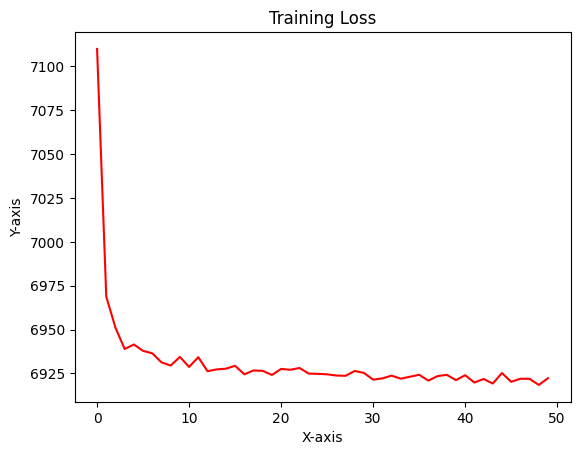

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Training Loss')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.plot(np.array(losses), 'r')
plt.show()

Pour minimiser l'erreur n'hesitez pas à :

1. Tester des architectures neuronales différentes (plus de couches de neurones)
2. Changer les hyper paramètres (plus d'epochs, autre learning rate, etc)
3. Normaliser vos données avant l'entraînement lors de la phase de préparation de la donnée. Si vous le faites, n'oubliez pas de revenir à l'échelle (dénormaliser) avant de faire des prédictions.

**6. SAUVEGARDE DU MODÈLE DANS UN FICHIER POUR UTILISATION ULTÈRIEURE**

**6. SAVE THE MODEL TO A FILE FOR LATER USE**

Sauvegarde le modèle entier entraîné dans un fichier pour l'utiliser après et le mettre en production

In [ ]:
# This step will upload the model to the Hopsworks Model Registry

import os
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib

input_schema = Schema(features_df)
output_schema = Schema(labels_df)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_name = "car_prices"

os.makedirs(model_name + "/images", exist_ok=True)

plt.savefig(model_name + "/images/training_losses.png")
plt.close()
# Sauvegarder le modèle
torch.save(model, model_name + '/modele_regresseur.pth')
joblib.dump(clf, model_name + '/label_encoders.pkl')

mr = proj.get_model_registry()

car_prices_model = mr.torch.create_model(
    model_name,
    model_schema=model_schema,
    metrics = {'test_loss' : test_loss}
)

# Save the created model in the "lending_model" directory
car_prices_model.save(model_name)

Connected. Call `.close()` to terminate connection gracefully.


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/23468 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/38202 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/2396 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/865 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/189590/models/car_prices/1


Model(name: 'car_prices', version: 1)

# Inference Pipeline

See above - we recommend that we split this notebook up in
1. feature engineering notebook
2. training notebook
3. inferencing notebook

Je suis curieux. Comment je peux visualiser ce qu'il y a à l'intérieur de ce fichier ainsi que les weights ?

In [ ]:
# We need to install a library to deploy the model. This install throws an error in colab, but will still work.

!pip install --quiet "hsfs[python] @ git+https://github.com/logicalclocks/feature-store-api@master#subdirectory=python"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 39.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hopsworks 3.7.0 requires hsfs[python]<3.8.0,>=3.7.0, but you have hsfs 4.0.0.dev1 which is incompatible.


In [ ]:
import hopsworks
import joblib
import torch
import torch.nn as nn

proj = hopsworks.login()
fs = proj.get_feature_store()
mr = proj.get_model_registry()

feature_view = fs.get_feature_view("car_prices", version=1)

model = mr.get_model(
    "car_prices",
    version=1,
)

# Download the model directory from the Model Registry
model_dir = model.download()

# Load the model using joblib from the downloaded model directory
label_encoders = joblib.load(model_dir + "/label_encoders.pkl")


# Définition du modèle
class DeepRegressor(nn.Module):
    def __init__(self, input_size):
        super(DeepRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Charger le fichier de modèle
model_data = torch.load(model_dir + '/modele_regresseur.pth', map_location=torch.device('cpu'))

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) BeerVolumePrediction
	 (2) rixdemo
	 (3) GraphEmbeddingsDemo

Enter project to access: 2

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/189590
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [ ]:
# Vérifier le type de l'objet chargé
# Check the type of the loaded object
if isinstance(model_data, dict) and 'model_state_dict' in model_data:
    state_dict = model_data['model_state_dict']
elif isinstance(model_data, torch.nn.Module):
    state_dict = model_data.state_dict()
else:
    raise ValueError("Le fichier ne contient pas un modèle PyTorch valide ou un format inattendu.")

# Afficher les poids de chaque couche
# Show weights of each layer
print("Affichage des poids des différentes couches du modèle :")
for layer_name, weights in state_dict.items():
    print(f"\nLayer: {layer_name}")
    print(f"Weights: {weights.shape}")
    print(weights)

# Si l'objet contient une autre structure, inspectez-la
# If the object contains another structure, inspect it
if isinstance(model_data, dict):
    print("\nStructure complète du modèle sauvegardé :")
    for key, value in model_data.items():
        if key != 'model_state_dict':
            print(f"\nStructure de la clé '{key}':")
            if isinstance(value, torch.Tensor):
                print(f"  - Tensor avec shape : {value.shape}")
            elif isinstance(value, dict):
                print("  - Dictionnaire avec clés :")
                for subkey in value.keys():
                    print(f"    - {subkey}")
            else:
                print(f"  - Type : {type(value)}")

# Si l'objet est directement le modèle, afficher son architecture
# If the object is directly the model, display its architecture
elif isinstance(model_data, torch.nn.Module):
    print("\nLe modèle sauvegardé est directement un module PyTorch.")
    print("Architecture du modèle :")
    print(model_data)

Affichage des poids des différentes couches du modèle :

Layer: fc1.weight
Weights: torch.Size([64, 10])
tensor([[ 1.6133e-01, -1.9060e-01,  1.8123e-01,  1.3346e-01,  2.9189e-01,
         -7.9471e-02,  3.4760e-01, -1.6517e+00, -2.1964e-02,  5.7604e-01],
        [-6.5027e-02, -1.0010e-02, -2.8226e-01,  8.6034e-02, -4.0165e-01,
          6.9020e-04,  3.7467e-02, -5.1134e-02, -4.6209e-01, -1.9222e-01],
        [-1.1082e+00, -6.3762e-01, -2.1065e-01, -1.3804e-01, -7.3709e-01,
         -7.1806e-02, -1.2862e+00,  1.1882e-03, -5.9189e-01, -6.5585e-01],
        [-1.2063e-01, -7.4006e-02,  1.4200e-01, -5.5177e-02, -1.0914e-01,
         -2.4644e-01, -2.9637e-01, -3.0770e-01,  1.8054e-01,  1.8537e-02],
        [ 1.2092e+00,  8.1522e-02, -6.3254e-01, -4.3982e-01, -1.5094e-01,
         -7.7438e-01,  1.3255e+00, -1.9659e-01,  1.4827e-01, -1.7639e-01],
        [ 9.4762e-03, -4.2432e-01, -1.3263e-01, -5.6167e-01,  5.1946e-02,
         -1.3983e-01, -4.4516e-01, -5.2172e-01, -1.6475e-01,  2.1179e-01],
 

In [ ]:
test_data = feature_view.get_batch_data(start_time="2015-07-01 00:00")
test_data

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (3.29s) 


,year,make,model,trim,body,transmission,condition,odometer,color,interior
0,2013,Toyota,Tacoma,V6,double cab,manual,27.0,43988.0,green,gray
1,2011,GMC,Yukon XL,Denali,suv,automatic,38.0,29767.0,black,black
2,2007,Chevrolet,Silverado 1500 Classic,LS2,crew cab,automatic,24.0,76663.0,gold,gray
3,2012,Chevrolet,Sonic,LT,Hatchback,manual,36.0,64312.0,brown,gray
4,2013,Dodge,Grand Caravan,SXT,Minivan,automatic,36.0,70859.0,gold,black
...,...,...,...,...,...,...,...,...,...,...
831,2014,Ford,Fusion Hybrid,Titanium,Sedan,automatic,45.0,33761.0,silver,black
832,2015,Volvo,V60,T5 Drive-E,Wagon,automatic,44.0,20846.0,silver,black
833,2006,Infiniti,G35,Base,Coupe,manual,22.0,1.0,gray,gray
834,2013,Nissan,Maxima,3.5 SV,Sedan,automatic,33.0,50363.0,silver,black


In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_data(dataset, label_encoders):
    # Itérer sur les colonnes du DataFrame
    for column in dataset.columns:
        # Vérifier si la colonne est de type 'object' (catégorique)
        if dataset[column].dtype == 'object':
            # Créer une instance de LabelEncoder
            label_encoder = LabelEncoder()

            # Effectuer l'encodage sur les valeurs uniques de la colonne
            dataset[column] = label_encoder.fit_transform(dataset[column])

            # Ajouter le label encoder au dictionnaire
            label_encoders[column] = label_encoder
    return dataset


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd

def predict_selling_price(data, label_encoders, model):
    # Prétraiter les données
    processed_data = encode_categorical_data(data, label_encoders)

    # Convertir les données en tenseurs PyTorch
    X_test = torch.tensor(processed_data.values.astype(np.float32))

    # Passer les données au modèle pour prédiction
    with torch.no_grad():
        model.eval()
        predictions = model(X_test).numpy()

    predictions_df = pd.DataFrame(predictions, columns=['predicted_sale_price'])
    data['predicted_sale_price'] = predictions_df['predicted_sale_price']
    return data

df_encoded = predict_selling_price(test_data, label_encoders, model_data)
df_encoded

,year,make,model,trim,body,transmission,condition,odometer,color,interior,predicted_sale_price
0,2013,36,204,210,24,1,27.0,43988.0,8,6,10234.306641
1,2011,10,235,81,36,0,38.0,29767.0,1,1,10270.067383
2,2007,5,190,132,21,0,24.0,76663.0,6,6,10120.397461
3,2012,5,193,133,9,1,36.0,64312.0,3,6,10188.467773
4,2013,7,100,191,10,0,36.0,70859.0,6,1,10179.033203
...,...,...,...,...,...,...,...,...,...,...,...
831,2014,9,88,200,14,0,45.0,33761.0,14,1,10286.096680
832,2015,38,217,197,18,0,44.0,20846.0,14,1,10345.520508
833,2006,14,92,66,1,1,22.0,1.0,7,6,9559.394531
834,2013,27,137,37,14,0,33.0,50363.0,14,1,10201.356445


**7. Utilisez votre modèle entraîné pour faire des estimations des prix**

Fais une fonction de prédiction pour charger le modèle entraîné et sauvegardé dans le fichier modele_regresseur.pth et puis tester sur une donné que l'utilisateur entrera manuellement. Pour rappel, les données catégoriques ont été codifiées et sauvegardées dans un fichier label_encoders.pth. Il y a aussi des variables numériques que l'utilisateur doit indiquer.

In [ ]:
!pip install --quiet gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s et

In [ ]:
import gradio as gr
from functools import partial

# Define the method that prints out the values entered
def print_values(year, make, model, trim, body, transmission, condition, odometer, color, interior, model_data, label_encoders):
    data = {
        "Year": [year],
        "Make": [make],
        "Model": [model],
        "Trim": [trim],
        "Body": [body],
        "Transmission": [transmission],
        "Condition": [condition],
        "Odometer": [odometer],
        "Color": [color],
        "Interior": [interior]
    }
    df = pd.DataFrame(data)
    df_encoded = predict_selling_price(df, label_encoders, model_data)
    return df_encoded.iloc[1]['predicted_sale_price']

print_values_partial = partial(print_values, model_data=model_data, label_encoders=label_encoders)


# Create the Gradio interface
with gr.Blocks() as demo:
    with gr.Row():
        year = gr.Number(label="Year", value=2011)
        make = gr.Textbox(label="Make", value="45")
        model = gr.Textbox(label="Model", value="435")
        trim = gr.Textbox(label="Trim", value="1016")
        body = gr.Textbox(label="Body", value="21")

    with gr.Row():
        transmission = gr.Textbox(label="Transmission", value="0")
        condition = gr.Number(label="Condition", value=43.0)
        odometer = gr.Number(label="Odometer", value=38831.0)
        color = gr.Textbox(label="Color", value="15")
        interior = gr.Textbox(label="Interior", value="6")

    submit_button = gr.Button("Submit")
    output = gr.JSON(label="Entered Values")

    submit_button.click(print_values,
                        inputs=[year, make, model, trim, body, transmission, condition, odometer, color, interior],
                        outputs=output)

# Launch the interface
demo.launch(share=True)


        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        

        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3487512cb59bae8299.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Replace `TemplateResponse(name, {"request": request})` by `TemplateResponse(request, name)`.



   Year  Make  Model  Trim  Body  Transmission  Condition  Odometer  Color  \
0  2011     0      0     0     0             0         43     38831      0   

   Interior  predicted_sale_price  
0         0          10333.405273  
